## Лекция 1: Арифметика с плавающей точкой, векторные нормы

# Представление чисел

- Вещественные числа являются фундаментальными в математике и науке, представляя непрерывные величины, такие как:
    - Вероятности (от 0 до 1)
    - Физические измерения (масса, скорость, температура и т.д.)
    - Финансовые значения (цены, процентные ставки)
    - Математические величины ($\pi$, $e$, $\sqrt{2}$)

- История систем счисления насчитывает тысячи лет:
    - Вавилоняне (2000 до н.э.) разработали одну из первых позиционных систем счисления
    - Они использовали систему с основанием 60 (шестидесятеричную), которая влияет на то, как мы измеряем время сегодня
    - Их система могла представлять как целые числа, так и дроби

<img src="./Babylonian_numerals.png" width=500>

- Современные компьютеры могут обрабатывать только двоичные (с основанием 2) числа:
    - Все данные должны быть преобразованы в последовательности 0 и 1
    - Это создает проблемы для представления вещественных чисел
    - Нам нужны эффективные способы кодирования как очень больших, так и очень малых чисел
    - Необходимо балансировать между точностью, диапазоном и использованием памяти
    - Понимание этих представлений критически важно для численных вычислений и машинного обучения

## Представление чисел с фиксированной точкой

 - Числа с фиксированной точкой - простейший способ представления вещественных чисел в цифровом виде
   - Также известен как формат **Qm.n**, где:
     - m бит для целой части
     - n бит для дробной части

 - Основные свойства:
   - Диапазон: $[-(2^m), 2^m - 2^{-n}]$
   - Разрешение: $2^{-n}$ (наименьшая представимая разница)
   - Хранение: всего $m + n + 1$ бит (включая знаковый бит)

 - Ограничения:
   - Фиксированный диапазон представимых чисел
   - Компромисс между диапазоном (m) и точностью (n)
   - Неэффективно для представления очень больших или очень малых чисел

# Числа с плавающей точкой

Числа в памяти компьютера обычно представлены как **числа с плавающей точкой**.

Число с плавающей точкой представляется как:

$$\textrm{number} = \textrm{significand} \times \textrm{base}^{\textrm{exponent}},$$

где:
- *significand* (значащая часть) - целое число
- *base* (основание) - положительное целое число  
- *exponent* (показатель степени) - целое число (может быть отрицательным)

Например:

$$ 1.2 = 12 \cdot 10^{-1}.$$

Этот формат имеет долгую историю. Он уже использовался в первом в мире работающем программируемом, полностью автоматическом цифровом компьютере [Z3](https://en.wikipedia.org/wiki/Z3_(computer)), спроектированном в 1935 году и завершенном в 1941 году в Германии [Конрадом Цузе](https://en.wikipedia.org/wiki/Konrad_Zuse).

## Числа с плавающей точкой: формула

$$f = (-1)^s 2^{(p-b)} \left( 1 + \frac{d_1}{2} + \frac{d_2}{2^2}  + \ldots + \frac{d_m}{2^m}\right),$$

где $s \in \{0, 1\}$ - знаковый бит, $d_i \in \{0, 1\}$ - $m$-битная мантисса, $p \in \mathbb{Z}; 0 \leq p \leq 2^e$, $e$ - $e$-битная экспонента, обычно определяемая как $2^e - 1$

Можно представить как равномерную $m$-битную сетку между двумя последовательными степенями числа $2$.

## Простые примеры

Существует много способов записать число в научной нотации, но всегда есть единственное нормализованное представление с ровно одной ненулевой цифрой слева от десятичной точки.

 For example:
 - $0.232 \times 10^3 = 23.2 \times 10^1 = 2.32 \times 10^2 = \ldots$
 - $01001 = 1.001 \times 2^3 = \ldots$

 **Пример 1:** Каково нормализованное представление числа $00101101.101$?

$0.0001101001110$ $= 1.110100111 \times 2^{-4}$

## Умножение более подробно

Рассмотрим два числа с плавающей точкой $x, y$, у которых экспоненты и дробные части равны $x_e, y_e$ и $x_m, y_m$ соответственно. Результат обычного умножения чисел с плавающей точкой будет:

$$
\operatorname{Mul}(x, y)=\left(1+x_m\right) \cdot 2^{x_e} \cdot\left(1+y_m\right) \cdot 2^{y_e}=\left(1+x_m+y_m+x_m \cdot y_m\right) \cdot 2^{x_e+y_e}
$$

Недавние статьи: [Addition is all you need](https://arxiv.org/pdf/2410.00907) пытаются доказать, что мы можем заменить это умножение сложением и все равно получить обучаемые нейронные сети (требует проверки).


## Фиксированная и плавающая точка

**В**: Каковы преимущества/недостатки чисел с фиксированной и плавающей точкой?

**A**:  In most cases, they work just fine.

- However, fixed point represents numbers within specified range and controls **absolute** accuracy.

- Floating point represent numbers with **relative** accuracy, and is suitable for the case when numbers in the computations have varying scale (i.e., $10^{-1}$ and $10^{5}$).

- In practice, if speed is of no concern, use float32 or float64 (на самом деле, нет!)

## Числа с плавающей точкой на логарифмической шкале
 
Визуализируем, как числа с плавающей точкой распределены на вещественной прямой:



Text(0.1, -0.05, 'Base (b) = $2$, Max exponent = $2$, Mantissa bits = $2$\nNumbers are of the form $(1 + x_m) \\cdot 2^e$, where $x_m$ is the fraction and $e$ is the exponent.')

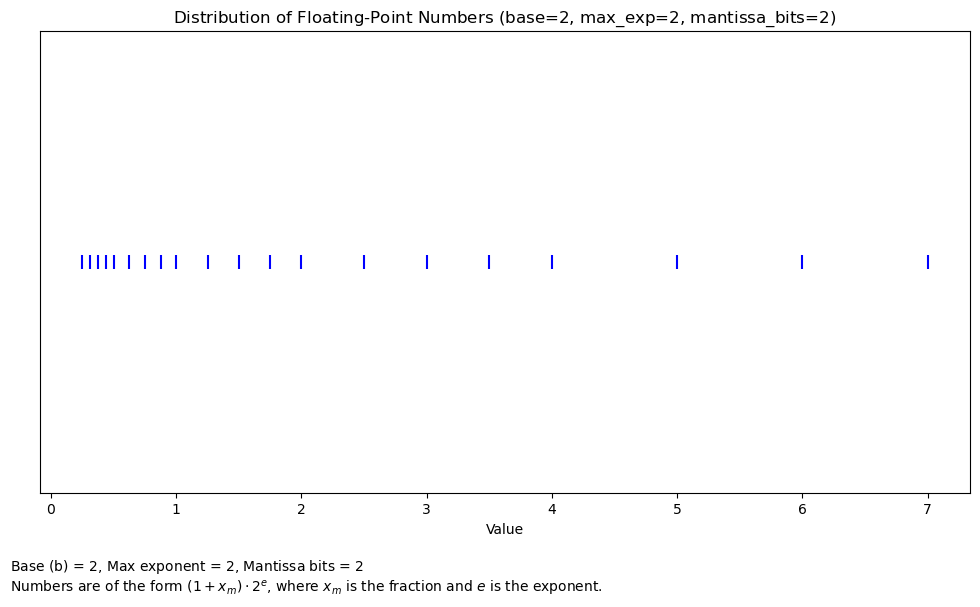

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for a small floating-point system
b = 2  # base
e_max = 2  # maximum exponent
mantissa_bits = 2  # number of bits for mantissa

# Generate all possible combinations of exponent and mantissa
exponents = range(-e_max, e_max + 1)
mantissas = np.linspace(0, 1 - 2**(-mantissa_bits), 2**mantissa_bits)

# Calculate floating-point numbers
fp_numbers = []
for e in exponents:
    for m in mantissas:
        fp_numbers.append((1 + m) * b**(e))

# Sort the numbers for proper visualization
fp_numbers.sort()

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the floating-point numbers
ax.scatter(fp_numbers, [1] * len(fp_numbers), marker='|', s=100, color='blue')
ax.set_ylim(0.5, 1.5)
ax.set_yticks([])  # Remove y-axis ticks

ax.set_title(r'Distribution of Floating-Point Numbers (base=$%d$, max_exp=$%d$, mantissa_bits=$%d$)' % (b, e_max, mantissa_bits))
ax.set_xlabel('Value')

# Add text explanation
plt.figtext(0.1, -0.05, 
    r"Base (b) = $%d$, Max exponent = $%d$, Mantissa bits = $%d$" % (b, e_max, mantissa_bits) + "\n" +
    r"Numbers are of the form $(1 + x_m) \cdot 2^e$, where $x_m$ is the fraction and $e$ is the exponent.",
    wrap=True)
#plt.tight_layout()
#plt.show()

## IEEE 754
В современных компьютерах представление чисел с плавающей точкой контролируется [стандартом IEEE 754](https://en.wikipedia.org/wiki/IEEE_floating_point), который был опубликован в **1985** году, и до этого момента разные компьютеры по-разному работали с числами с плавающей точкой.

IEEE 754 имеет:
- Представление чисел с плавающей точкой (как описано выше), $(-1)^s \times c \times b^q$.
- Две бесконечности, $+\infty$ и $-\infty$
- Два нуля: +0 и -0
- Два вида **NaN**: тихий NaN (**qNaN**) и сигнальный NaN (**sNaN**)
    - qNaN не вызывает исключение на уровне модуля операций с плавающей точкой (FPU), пока вы не проверите результат вычислений
    - значение sNaN вызывает исключение от FPU при использовании соответствующей переменной. Этот тип NaN может быть полезен для целей инициализации
    - C++11 предлагает [стандартный интерфейс](https://en.cppreference.com/w/cpp/numeric/math/nan) для создания различных NaN
- Правила **округления**
- Правила для $\frac{0}{0}, \frac{1}{-0}, \ldots$

Возможные значения определяются с помощью
- основания $b$
- точности $p$ - количество цифр
- максимально возможного значения $e_{\max}$

и имеют следующие ограничения
- $ 0 \leq c \leq b^p - 1$
- $1 - e_{\max} \leq q + p - 1 \leq e_{\max}$

## Одинарная и двойная точность

Два стандартных формата, называемые **binary32** и **binary64** (также называемые форматами **одинарной** и **двойной** точности). В последнее время формат **binary16** играет важную роль в обучении глубоких нейронных сетей.

| Название | Общее название | Основание | Разряды | Emin | Emax |
|------|----------|----------|-------|------|------|
|binary16| половинная точность | 2 | 11 | -14 | + 15 |
|binary32| одинарная точность | 2 | 24 | -126 | + 127 |  
|binary64| двойная точность | 2 | 53 | -1022 | +1023 |  
<img src="./double64.png">

## Примеры

- Для числа +0
    - *sign* равен 0
    - *exponent* равен 00000000000
    - *fraction* состоит из нулей
- Для числа -0
    - *sign* равен 1
    - *exponent* равен 00000000000
    - *fraction* состоит из нулей
- Для +бесконечности
    - *sign* равен 0
    - *exponent* равен 11111111111
    - *fraction* состоит из нулей

**Вопрос**: что насчет -бесконечности и NaN?

## Точность и память

**Относительная точность** одинарной точности составляет $10^{-7}-10^{-8}$, в то время как для двойной точности - $10^{-14}-10^{-16}$.

<font color='red'> Важное замечание 1: </font> **float16** занимает **2 байта**, **float32** занимает **4 байта**, **float64**, или двойная точность, занимает **8 байт**.

<font color='red'> Важное замечание 2: </font> Только эти два типа чисел с плавающей точкой поддерживаются аппаратно (float32 и float64) + на GPU/TPU поддерживаются различные типы с плавающей точкой.

<font color='red'> Важное замечание 3: </font> Вам следует использовать **двойную точность** в вычислительной науке и инженерии, и **float32/float16** на GPU/в науке о данных.

Сейчас для больших моделей float16 становится все более надежным.


## Как формат представления чисел влияет на обучение нейронных сетей (НС)?

- Веса в слоях (полносвязных, сверточных, функциях активации) могут храниться с разной точностью
- Важно повышать энергоэффективность устройств, используемых для обучения НС
- Проект [DeepFloat](https://github.com/facebookresearch/deepfloat) от Facebook демонстрирует, как переработать операции с плавающей точкой для обеспечения эффективности при обучении НС, подробнее см. в этой [статье](https://arxiv.org/pdf/1811.01721.pdf)
- Влияние представления вещественных чисел на градиенты функций активации
- Обычно первая цифра равна единице
- Субнормальные числа имеют первую цифру 0 для представления нулей и чисел, близких к нулю
- Субнормальные числа заполняют промежуток между положительными и отрицательными числами
- У них есть проблемы с производительностью, часто по умолчанию обнуляются

<img width=500, src="./grad_norm_fp16.png">

- И на кривых обучения

<img width=500, src="./train_val_curves.png">

Графики взяты из [этой статьи](https://arxiv.org/pdf/1710.03740.pdf%EF%BC%89%E3%80%82)

## bfloat16 (Brain Floating Point)

- Этот формат занимает 16 бит
    - 1 бит для sign
    - 8 бит для exponent
    - 7 бит для fraction
    <img src="./bfloat16.png">
- Усеченный формат одинарной точности из стандарта IEEE
- В чем разница между float32 и float16?
- Этот формат используется в Intel FPGA, Google TPU, Xeon CPUs и других платформах

## Tensor Float от Nvidia ([блог пост об этом формате](https://blogs.nvidia.com/blog/2020/05/14/tensorfloat-32-precision-format/))

- Сравнение с другими форматами

<img src="./tensor_float_cf.png">

- Результаты

<img src="./TF32-BERT.png">

- PyTorch и Tensorflow с поддержкой этого формата доступны в [Nvidia NCG](https://ngc.nvidia.com/catalog/all)

## Альтернатива стандарту IEEE 754

Проблемы в IEEE 754:
- переполнение в бесконечность или ноль
- множество различных NaN
- невидимые ошибки округления
- точность либо очень высокая, либо очень низкая
- subnormal numbers – числа между 0 и минимальным возможным представимым числом, т.е. significand начинается с нуля

Концепция **posits** может заменить числа с плавающей точкой, см. [эту статью](http://www.johngustafson.net/pdfs/BeatingFloatingPoint.pdf)

<img width=600 src="./posit.png">

- представляют числа с некоторой точностью, но обеспечивают пределы изменения
- нет переполнений!
- пример представления числа

<img width=600 src="./posit_example.png">

### Демонстрация точности деления

In [4]:
import random
import numpy as np

c = np.float32(0.925924589693)
print(c)
a = np.float32(1.786875867457e-2)
b = np.float32(c / a)
print('{0:10.16f}'.format(b))
print(abs(a * b - c)/abs(c))

0.9259246
51.8180694580078125
0.0


### Квадратный корень

In [7]:
a = np.float64(1e-100)
b = np.sqrt(a)
print(b.dtype)
print('{0:10.64f}'.format(abs(b * b - a)/abs(a)))

float64
0.0000000000000000000000000000000000000000000000000000000000000000


### Демонстрация точности экспоненты

In [9]:
a = np.float32(0.000001)
b = np.exp(a)
print(b.dtype)
print((np.log(b) - a)/a)

float32
-0.046326134


## Еще примерчики

/var/folders/x_/_k8z8m6s2qxc_j4gwz6fpvmm0000gp/T/ipykernel_10237/1439480773.py:12: RuntimeWarning: invalid value encountered in divide
  y_b[nonzero] = (np.log(x[nonzero]+1))/((1+x[nonzero])-1) - 1  # (b


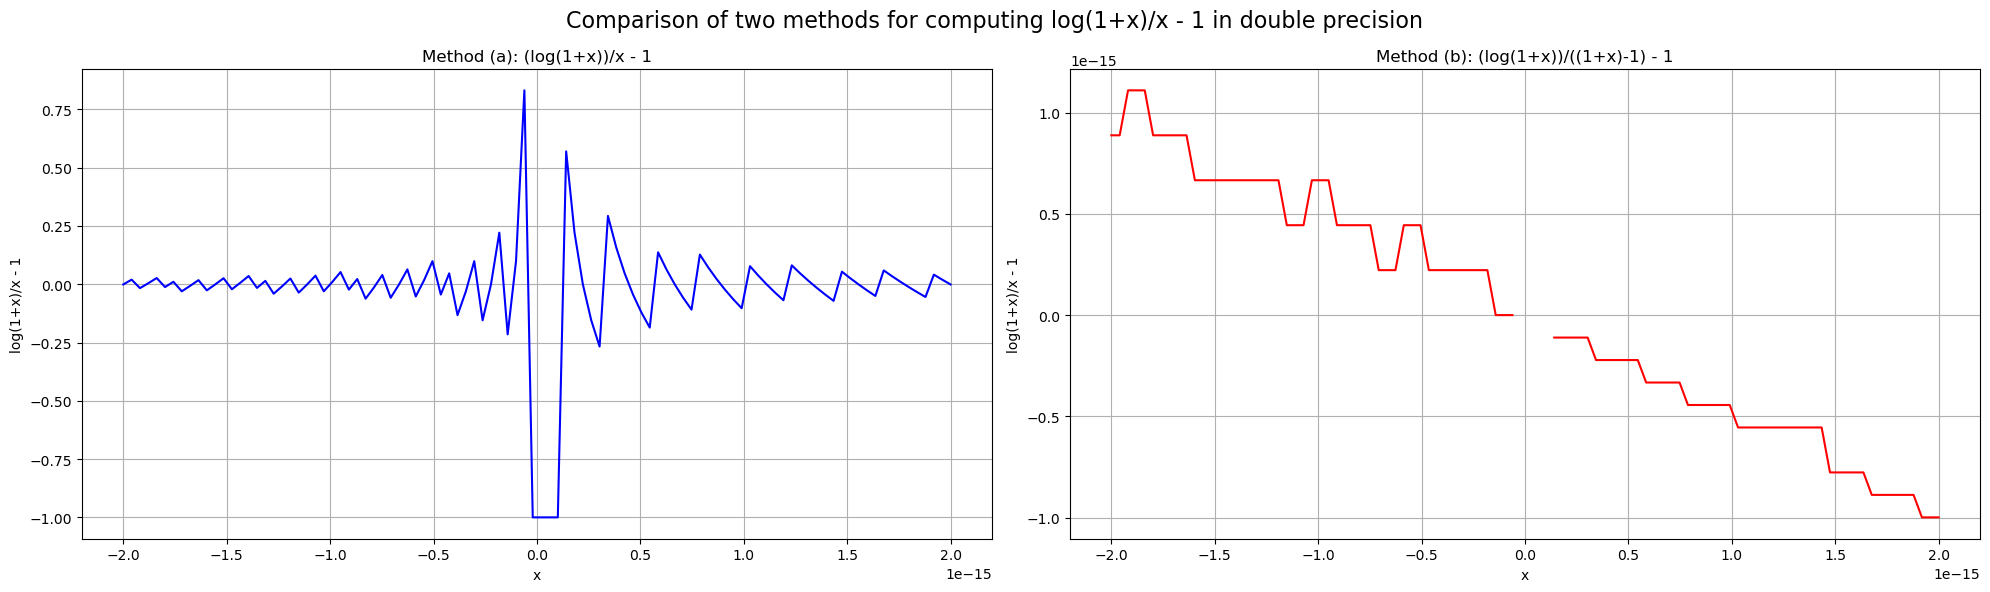

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create x points in the range [-2e-15, 2e-15]
x = np.linspace(-2e-15, 2e-15, 100)

# Compute log(1+x)/x - 1 using method (a) and (b), being careful about x=0
y_a = np.zeros_like(x)
y_b = np.zeros_like(x)
nonzero = x != 0
y_a[nonzero] = (np.log(x[nonzero]+1))/x[nonzero] - 1  # (a)
y_b[nonzero] = (np.log(x[nonzero]+1))/((1+x[nonzero])-1) - 1  # (b

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot for method (a)
ax1.plot(x, y_a, 'b-')
ax1.grid(True)
ax1.set_xlabel('x')
ax1.set_ylabel('log(1+x)/x - 1')
ax1.set_title('Method (a): (log(1+x))/x - 1')

# Plot for method (b)
ax2.plot(x, y_b, 'r-')
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel('log(1+x)/x - 1')
ax2.set_title('Method (b): (log(1+x))/((1+x)-1) - 1')

# Adjust layout and add a main title
plt.tight_layout()
fig.suptitle('Comparison of two methods for computing log(1+x)/x - 1 in double precision', fontsize=16)
plt.subplots_adjust(top=0.88)

plt.show()

## Итоги демо

- Для некоторых значений обратные функции дают точные ответы
- Относительная accuracy должна сохраняться благодаря IEEE standard
- Не выполняется для многих современных GPU
- Больше деталей про адаптацию IEEE 754 standard для GPU можно найти [здесь](https://docs.nvidia.com/cuda/floating-point/index.html#considerations-for-heterogeneous-world)

## Потеря значимых цифр

- Многие операции приводят к потере цифр [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance)
- Например, плохая идея вычитать два больших близких числа, разность будет иметь меньше правильных цифр
- Это связано с алгоритмами и их свойствами (forward/backward stability), которые мы обсудим позже

## Summation algorithm

Однако ошибки округления могут зависеть от алгоритма.

- Рассмотрим простейшую задачу: даны $n$ чисел с плавающей точкой $x_1, \ldots, x_n$

- Вычислить их сумму

$$S = \sum_{i=1}^n x_i = x_1 + \ldots + x_n.$$

- Простейший алгоритм - складывать числа одно за другим

- Какова реальная ошибка такого алгоритма?

## Наивный алгоритм 

$$y_1 = x_1, \quad y_2 = y_1 + x_2, \quad y_3 = y_2 + x_3, \ldots.$$

- **Worst-case** ошибка пропорциональна $\mathcal{O}(n)$, в то время как **mean-squared** ошибка равна $\mathcal{O}(\sqrt{n})$.

- **Kahan algorithm** дает границу **worst-case** ошибки $\mathcal{O}(1)$ (т.е. независимо от $n$).

- <font color='red'> Можете ли вы найти алгоритм лучше?

## Суммирование Кахана
Следующий алгоритм дает ошибку $2 \varepsilon + \mathcal{O}(n \varepsilon^2)$, где $\varepsilon$ - это machine precision.

- Причина потери значимости при суммировании заключается в операциях с числами разного порядка
- Основная идея Kahan summation состоит в том, чтобы отслеживать маленькие ошибки и аккумулировать их в отдельной переменной
- Этот подход называется *compensated summation*

In [10]:
import math
import numpy as np
from numba import jit as numba_jit

n = 10 ** 6
sm = 1e-10
x = np.ones(n, dtype=np.float32) * sm
x[0] = 1.0
true_sum = 1.0 + (n - 1)*sm
approx_sum = np.sum(x)
math_fsum = math.fsum(x)

@numba_jit(nopython=True)
def kahan_sum_numba(x):
    s = np.float32(0.0)
    c = np.float32(0.0)
    for i in range(len(x)):
        y = x[i] - c
        t = s + y
        c = (t - s) - y
        s = t
    return s

def simple_sum(x):
    s = 0.0
    for i in range(len(x)):
        s += x[i]
    return s

k_sum_numba = kahan_sum_numba(x)
simple_sum_result = simple_sum(x)

print('Error in np sum: {0:3.1e}'.format(approx_sum - true_sum))
print('Error in simple sum: {0:3.1e}'.format(simple_sum_result - true_sum))
print('Error in Kahan sum Numba: {0:3.1e}'.format(k_sum_numba - true_sum))
print('Error in math fsum: {0:3.1e}'.format(math_fsum - true_sum))

Error in np sum: 1.7e-06
Error in simple sum: -1.0e-04
Error in Kahan sum Numba: 1.7e-08
Error in math fsum: 1.3e-12


## Итого
- Необходимо быть очень осторожным с числами с плавающей точкой, так как они могут давать неверные результаты из-за ошибок округления.

- Для многих стандартных алгоритмов стабильность хорошо изучена и проблемы могут быть легко обнаружены.

## Векторы
- В численной линейной алгебре мы обычно работаем не с **числами**, а с **векторами**
- Напомним, что вектор в фиксированном базисе размера $n$ может быть представлен как одномерный массив с $n$ числами
- Как правило, он рассматривается как матрица размера $n \times 1$ (**вектор-столбец**)

**Пример:**
Многочлены степени $\leq n$ образуют линейное пространство.
Многочлен $ x^3 - 2x^2 + 1$ может быть представлен как вектор $\begin{bmatrix}1 \\ -2 \\ 0 \\ 1\end{bmatrix}$ в базисе $\{x^3, x^2, x, 1\}$

## Норма вектора

- Векторы обычно предоставляют (приближенное) описание физического (или какого-либо другого) объекта

- Один из главных вопросов - насколько точным является приближение (1%, 10%)

- Приемлемое представление, конечно, зависит от конкретного применения. Например:
    - В дифференциальных уравнениях в частных производных точности $10^{-5} - 10^{-10}$ являются типичным случаем
    - В приложениях, основанных на данных, иногда ошибка в $80\%$ допустима, так как полезный сигнал искажен сильным шумом

## Расстояния и нормы

- Норма - это **количественная мера малости вектора**, которая обычно обозначается как $\Vert x \Vert$.

Норма должна удовлетворять определенным свойствам:

- $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$
- $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (неравенство треугольника)
- Если $\Vert x \Vert = 0$, то $x = 0$

Расстояние между двумя векторами определяется как

$$ d(x, y) = \Vert x - y \Vert. $$

Стандартные нормы
Наиболее известной и широко используемой нормой является **евклидова норма**:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

которая соответствует расстоянию в нашей реальной жизни. Если векторы имеют комплексные элементы, мы используем их модуль.

## $p$-норма
Евклидова норма, или $2$-норма, является подклассом важного класса $p$-норм:

$$ \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}. $$

Существуют два очень важных частных случая:
- Норма Чебышева, определяется как элемент с максимальным абсолютным значением:

$$ \Vert x \Vert_{\infty} = \max_i | x_i| $$

<img src="chebyshev.jpeg">

- $L_1$ норма (или **манхэттенское расстояние**), которая определяется как сумма модулей элементов $x$:

$$ \Vert x \Vert_1 = \sum_i |x_i| $$
  
<img src="manhattan.jpeg">


## Эквивалентность норм
Все нормы эквивалентны в том смысле, что

$$ C_1 \Vert x \Vert_* \leq  \Vert x \Vert_{**} \leq C_2 \Vert x \Vert_* $$  

для некоторых положительных констант $C_1(n), C_2(n)$, $x \in \mathbb{R}^n$ для любой пары норм $\Vert \cdot \Vert_*$ и $\Vert \cdot \Vert_{**}$. Эквивалентность норм по существу означает, что если вектор мал в одной норме, то он мал и в другой норме. Однако константы могут быть большими.

## Вычисление норм в Python

Пакет NumPy содержит все необходимое для вычисления норм: функция ```np.linalg.norm```


In [13]:
import numpy as np
n = 100
a = np.random.randn(n)
b = a + 1e-5 * np.random.normal((n,))
print('Relative error in L1 norm:', np.linalg.norm(a - b, 1) / np.linalg.norm(b, 1))
print('Relative error in L2 norm:', np.linalg.norm(a - b) / np.linalg.norm(b))
print('Relative error in Chebyshev norm:', np.linalg.norm(a - b, np.inf) / np.linalg.norm(b, np.inf))

Relative error in L1 norm: 0.0013743710119635821
Relative error in L2 norm: 0.0010294800327283588
Relative error in Chebyshev norm: 0.0004017056903068766


## Единичные шары в различных нормах

- Единичный шар - это множество точек, таких что $\Vert x \Vert \leq 1$
- Для евклидовой нормы единичный шар является обычным кругом
- Для других норм единичные шары выглядят совершенно по-разному

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=0.5$')

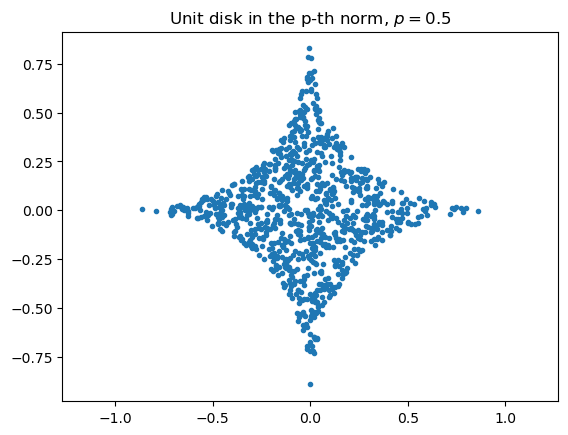

In [18]:

import matplotlib.pyplot as plt
p = 0.5 # Which norm do we use
M = 10000 # Number of sampling points
b = []
for i in range(M):
    a = np.random.randn(2, 1)
    if np.linalg.norm(a[:, 0], p) <= 1:
        b.append(a[:, 0])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

## Что такое устойчивый алгоритм?

И мы завершаем лекцию понятием **устойчивости**.

- Пусть $x$ - объект (например, вектор)
- Пусть $f(x)$ - функция (функционал), которую вы хотите вычислить

У вас также есть **численный алгоритм** ``alg(x)``, который фактически вычисляет **приближение** к $f(x)$.

Алгоритм называется **устойчивым**, если

$$\Vert \text{alg}(x) - f(x) \Vert  \leq \varepsilon $$

Алгоритм называется **обратно устойчивым**, если для любого $x$ существует близкий вектор $x + \delta x$ такой, что

$$\text{alg}(x) = f(x + \delta x)$$

и $\Vert \delta x \Vert$ мало.

## Классический пример
Классическим примером является **решение систем линейных уравнений** с помощью метода Гаусса, который похож на LU-разложение (подробнее позже)

Рассмотрим **матрицу Гильберта** с элементами

$$A = \{a_{ij}\}, \quad a_{ij} = \frac{1}{i + j + 1}, \quad i,j = 0, \ldots, n-1.$$

И рассмотрим линейную систему

$$Ax = f.$$


1.3614802098870779e-07


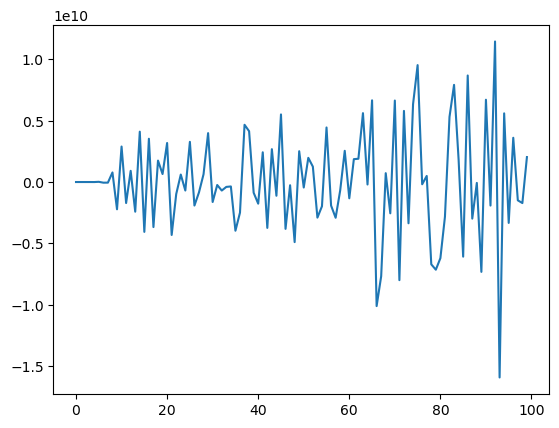

In [22]:
import numpy as np
n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)] # Hilbert matrix
A = np.array(a)
#rhs =  np.random.randn(n)
rhs = np.ones(n)
sol = np.linalg.solve(A, rhs)
print(np.linalg.norm(A @ sol - rhs)/np.linalg.norm(rhs))
plt.plot(sol)

In [34]:
rhs = np.ones(n)
sol = np.linalg.solve(A, rhs)
print(np.linalg.norm(A @ sol - rhs)/np.linalg.norm(rhs))
#plt.plot(sol)

0.0018351191


## Больше примеров неустойчивости

Как вычислить следующие функции численно устойчивым способом?

- $\log(1 - \tanh^2(x))$
- $\text{SoftMax}(x)_j = \dfrac{e^{x_j}}{\sum\limits_{i=1}^n e^{x_i}}$

In [23]:
u = 30
eps = 1e-6
print("Исходная функция:", np.log(1 - np.tanh(u)**2))
eps_add = np.log(1 - np.tanh(u)**2 + eps)
print("Попытка улучшить стабильность добавлением малой константы:", eps_add)
print("Использование более численно стабильной формы:", np.log(4) - 2 * np.log(np.exp(-u) + np.exp(u)))

Исходная функция: -inf
Попытка улучшить стабильность добавлением малой константы: -13.815510557964274
Использование более численно стабильной формы: -58.61370563888011


/var/folders/x_/_k8z8m6s2qxc_j4gwz6fpvmm0000gp/T/ipykernel_10237/1002619719.py:3: RuntimeWarning: divide by zero encountered in log
  print("Исходная функция:", np.log(1 - np.tanh(u)**2))


In [15]:
n = 5
x = np.random.normal(size=(n,))
x[0] = 1000
print(np.exp(x) / np.sum(np.exp(x)))
print(np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x))))

[nan  0.  0.  0.  0.]
[1. 0. 0. 0. 0.]


/var/folders/x_/_k8z8m6s2qxc_j4gwz6fpvmm0000gp/T/ipykernel_7697/1311588733.py:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(x) / np.sum(np.exp(x)))
/var/folders/x_/_k8z8m6s2qxc_j4gwz6fpvmm0000gp/T/ipykernel_7697/1311588733.py:4: RuntimeWarning: invalid value encountered in divide
  print(np.exp(x) / np.sum(np.exp(x)))


## Основные выводы
- Числа с плавающей точкой (двойная, одинарная точность, количество байт), ошибки округления
- Нормы как меры малости, используются для вычисления точности
- Нормы: $1$, $p$ и евклидова
- Прямая/обратная ошибка (и устойчивость алгоритмов) (в следующих лекциях)